In [1]:
library(tibble)
library(caret)
source('utils.r')
source('selinf_functions.r')
library("plotrix")
library('fastDummies')

Warning message:
"il pacchetto 'tibble' è stato creato con R versione 4.2.3"


Warning message:
"il pacchetto 'caret' è stato creato con R versione 4.2.3"
Caricamento del pacchetto richiesto: ggplot2

Warning message:
"il pacchetto 'ggplot2' è stato creato con R versione 4.2.3"
Caricamento del pacchetto richiesto: lattice

Warning message:
"il pacchetto 'lattice' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'tidyverse' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'tidyr' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'readr' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'purrr' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'dplyr' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'stringr' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'forcats' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'lubridate' è stato creato con R versione 4.2.3"
── Attaching core tidyverse packages ───────────────────

In [2]:
data <- read.csv('C:/Users/dalma/Desktop/Matteo/phd/combined_data.csv', sep=';')

In [3]:
head(data)

,id,visit,meal,time,t2,t3,t4,TG,ABCA1,ABCB1,⋯,GUSB,HPRT1,OAZ1,POLR1B,POLR2A,PPIA,RPL19,SDHA,TBP,TUBB
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,3,0,0,0,0,0.98,79.81,107.85,⋯,120.79,401.19,5715.81,56.08,517.66,157.45,16390.36,66.86,239.42,504.72
2,2,1,3,1,1,0,0,1.28,79.81,107.85,⋯,120.79,401.19,5715.81,56.08,517.66,157.45,16390.36,66.86,239.42,504.72
3,2,1,3,2,0,1,0,1.15,79.81,107.85,⋯,120.79,401.19,5715.81,56.08,517.66,157.45,16390.36,66.86,239.42,504.72
4,2,1,3,3,0,0,1,1.10,79.81,107.85,⋯,120.79,401.19,5715.81,56.08,517.66,157.45,16390.36,66.86,239.42,504.72
5,7,1,3,0,0,0,0,0.80,68.04,121.80,⋯,120.96,431.77,6216.17,44.52,307.45,254.53,17890.81,102.48,274.69,335.17
6,7,1,3,1,1,0,0,1.77,68.04,121.80,⋯,120.96,431.77,6216.17,44.52,307.45,254.53,17890.81,102.48,274.69,335.17


* Get rid of _visit_ as a variable, not interested
* Normalize all mRNA columns
* Code _id_, _meal_ and _time_ as a dummy

In [4]:
data[,9:ncol(data)] <- scale(data[,9:ncol(data)])
data <- subset(data, select = -c(visit))

In [5]:
data$id <- as.factor(data$id)
data$meal <- as.factor(data$meal)
data$time <- as.factor(data$time)

In [6]:
# two subjects (id 32 and 76), have outlier responses, should they be excluded?

#drop <- or((data$id==32),(data$id==76))
#data <- data[drop==0,]

## Plotting response profiles

In [314]:
plot_response_profiles <- function(data, id=NULL, meal=NULL){

    y <- data$TG
    times <- c(0,1,2,3)
    selection <- rep(1,length(y))
    if(!is.null(id)) selection <- selection*(data$id==id)
    if(!is.null(meal)) selection <- selection*(data$meal==meal)

    group = paste(as.character(data[selection==1,c('meal')]),as.character(data[selection==1,c('id')]),sep="")
    ggplot(data = data[selection==1,], aes(x=data[selection==1,]$time, y=y[selection==1])) +
        geom_line(aes(group=group, color=data[selection==1,'meal'])) +
        geom_point(aes(group=group, color=data[selection==1,'meal'])) +
        xlab('Time') + ylab('TG') + labs(colour="Meal")

}

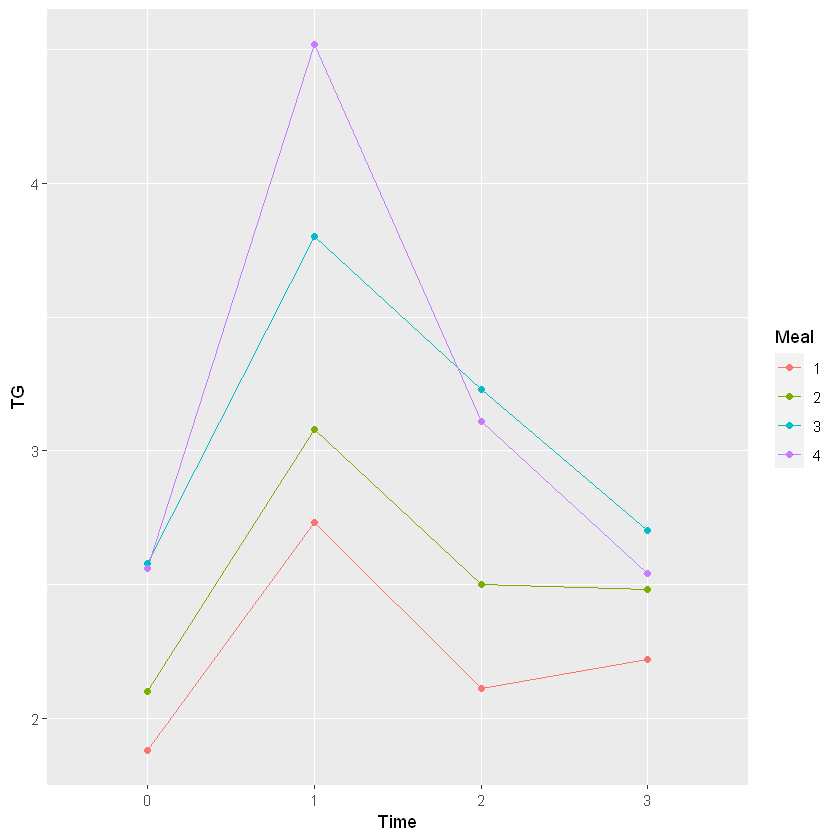

In [315]:
plot_response_profiles(data, id = 32, meal = NULL)

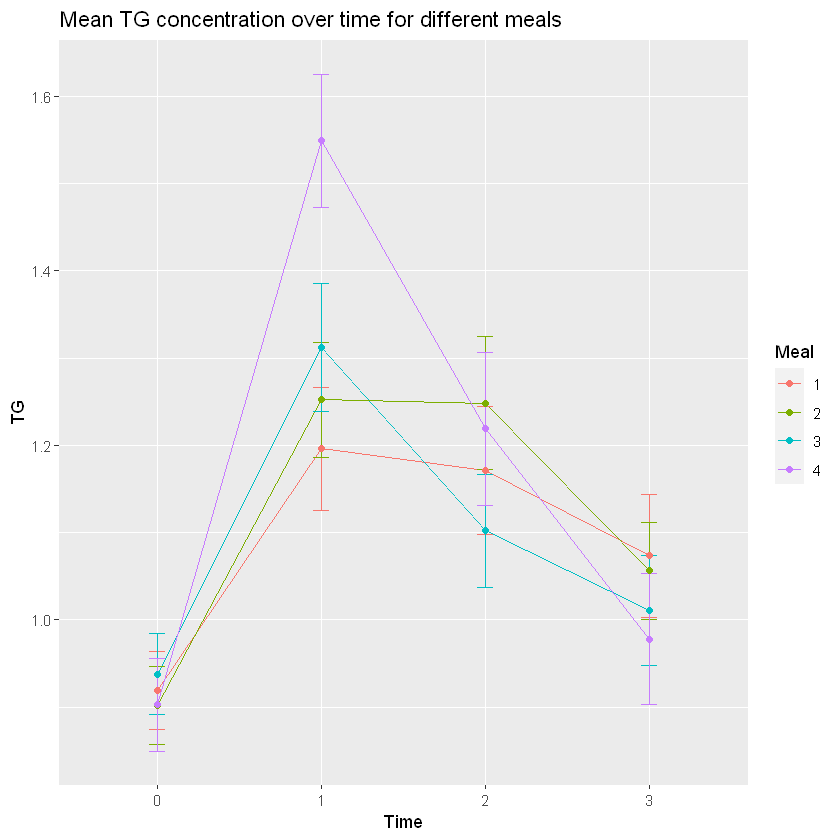

In [299]:
mean_data <- aggregate(data$TG,by=list(data$meal,data$time),FUN=mean)
se_data <- aggregate(data$TG,by=list(data$meal,data$time),FUN=std.error)

# obtains Figure 2 of the paper
ggplot(data = mean_data, aes(x=mean_data[,'Group.2'], y=x)) +
        geom_line(aes(group=mean_data[,'Group.1'], color=mean_data[,'Group.1'])) +
        geom_errorbar(aes(ymin=x-se_data$x, ymax=x+se_data$x,group=mean_data[,'Group.1'], color=mean_data[,'Group.1']), width=.1) +
        geom_point(aes(group=mean_data[,'Group.1'], color=mean_data[,'Group.1'])) +
        xlab('Time') + ylab('TG') + labs(colour="Meal") + ggtitle('Mean TG concentration over time for different meals')

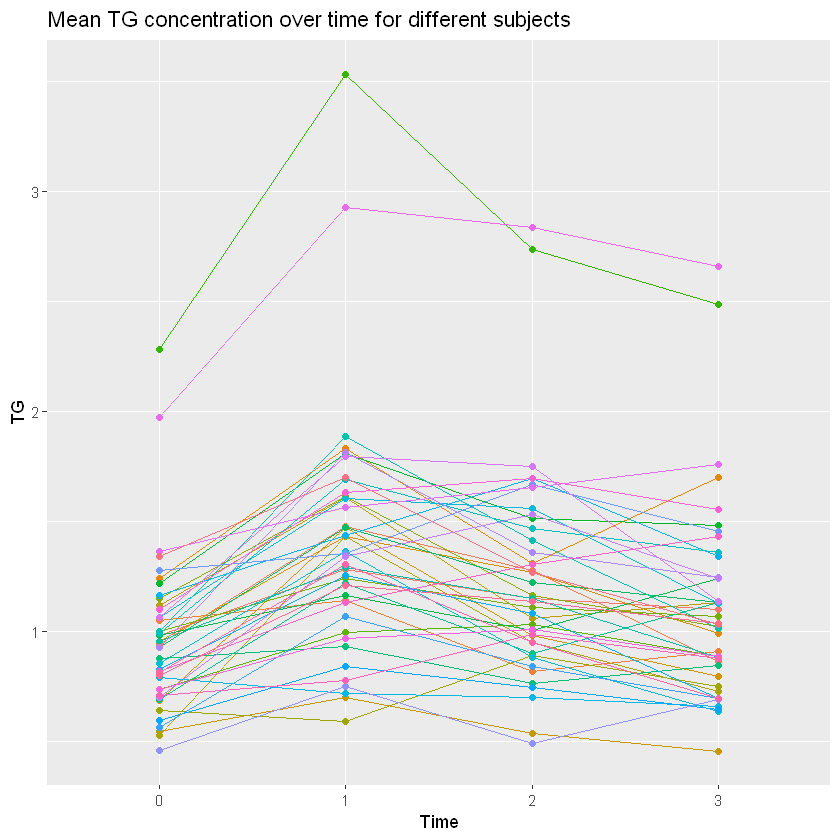

In [313]:
mean_data <- aggregate(data$TG,by=list(data$id,data$time),FUN=mean)
se_data <- aggregate(data$TG,by=list(data$id,data$time),FUN=std.error)


ggplot(data = mean_data, aes(x=mean_data[,'Group.2'], y=x)) +
        geom_line(aes(group=mean_data[,'Group.1'], color=mean_data[,'Group.1'])) +
        geom_point(aes(group=mean_data[,'Group.1'], color=mean_data[,'Group.1'])) +
        xlab('Time') + ylab('TG') + theme(legend.position = "none") + ggtitle('Mean TG concentration over time for different subjects')

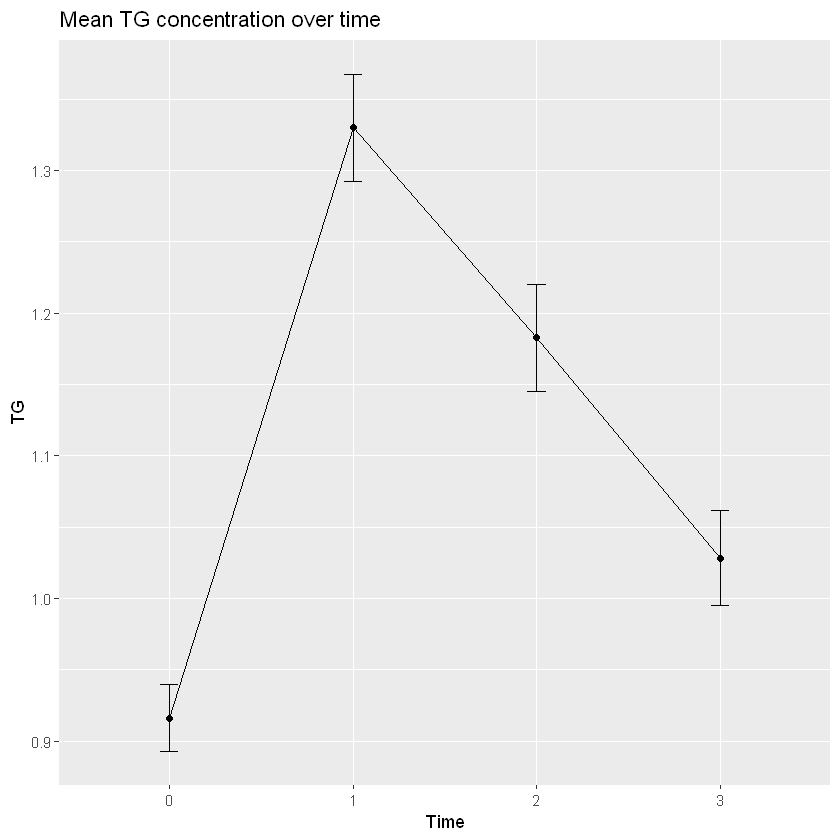

In [298]:
mean_data <- aggregate(data$TG,by=list(data$time),FUN=mean)
se_data <- aggregate(data$TG,by=list(data$time),FUN=std.error)


ggplot(data = mean_data, aes(x=mean_data[,'Group.1'], y=x, group=1)) +
        geom_line() +
        geom_errorbar(aes(ymin=x-se_data$x, ymax=x+se_data$x,), width=.1) +
        geom_point() +
        xlab('Time') + ylab('TG') + ggtitle('Mean TG concentration over time')

## Variable selection with GLMMLasso

In [30]:
fixed_form = as.formula(
    paste("TG ~ 1 + as.factor(meal) + t2 + t3 + t4 + ",paste(colnames(data[,9:ncol(data)]), sep="", collapse='+'),sep="")
  )

In [31]:
glm1 <- glmmLasso(fix = fixed_form, rnd = list(id =~ 1 + t2 + t3 + t4), data=data,
                    , lambda=50,switch.NR=FALSE,final.re=FALSE)

Warning message in est.glmmLasso.RE(fix = fix, rnd = rnd, data = data, lambda = lambda, :
"Random slopes are not standardized back!"


In [32]:
glm1

Call:
glmmLasso(fix = fixed_form, rnd = list(id = ~1 + t2 + t3 + t4), 
    data = data, lambda = 50, switch.NR = FALSE, final.re = FALSE)

Fixed Effects:

Coefficients:
              (Intercept)          as.factor(meal)2          as.factor(meal)3 
             1.207479e+00              0.000000e+00              0.000000e+00 
         as.factor(meal)4                        t2                        t3 
             0.000000e+00              3.096525e-02              0.000000e+00 
                       t4                     ABCA1                     ABCB1 
             0.000000e+00             -2.476911e-04              0.000000e+00 
                    ABCG1                      ABL1                     ACACA 
            -2.044544e-02              0.000000e+00              0.000000e+00 
                      ADA                       AHR                     AICDA 
            -6.717462e-03              0.000000e+00              0.000000e+00 
                     AIRE                

In [45]:
X <- subset(data, select = -c(id,meal,time,t2,t3,t4,TG))
y <- data$TG

lambda_max <- max(abs(t(X) %*% y))
lambda_max

[1] 40361296

In [17]:
X <- subset(data, select = -c(id,visit,meal,time,t2,t3,t4,TG))
y <- data$TG

lambda_max <- max(abs(t(X) %*% y))
lambdas <- linspace(lambda_max,lambda_max*0.01, n=50)
BIC_vec<-rep(Inf,length(lambdas))

for(j in 1:length(lambdas))
{

suppressWarnings(glm1 <- try(glmmLasso(fix = fixed_form, rnd = list(id =~ 1 + as.factor(time)), data=data,
                    , lambda=lambdas[j],switch.NR=FALSE,final.re=FALSE), silent=TRUE))

if(!inherits(glm1, "try-error"))
{  
    BIC_vec[j]<-glm1$bic
}else{break}

}

opt<-which.min(BIC_vec)

glm1_final <- glmmLasso(fix = fixed_form, rnd = list(id =~ 1), data=data,
                        , lambda=lambdas[opt],switch.NR=FALSE,final.re=FALSE)

In [18]:
glm1_final

Call:
glmmLasso(fix = fixed_form, rnd = list(id = ~1), data = data, 
    lambda = lambdas[opt], switch.NR = FALSE, final.re = FALSE)

Fixed Effects:

Coefficients:
              (Intercept)          as.factor(meal)2          as.factor(meal)3 
                   1.2141                    0.0000                    0.0000 
         as.factor(meal)4          as.factor(time)1          as.factor(time)2 
                   0.0000                    0.0000                    0.0000 
         as.factor(time)3                     ABCA1                     ABCB1 
                   0.0000                    0.0000                    0.0000 
                    ABCG1                      ABL1                     ACACA 
                   0.0000                    0.0000                    0.0000 
                      ADA                       AHR                     AICDA 
                   0.0000                    0.0000                    0.0000 
                     AIRE                   AN

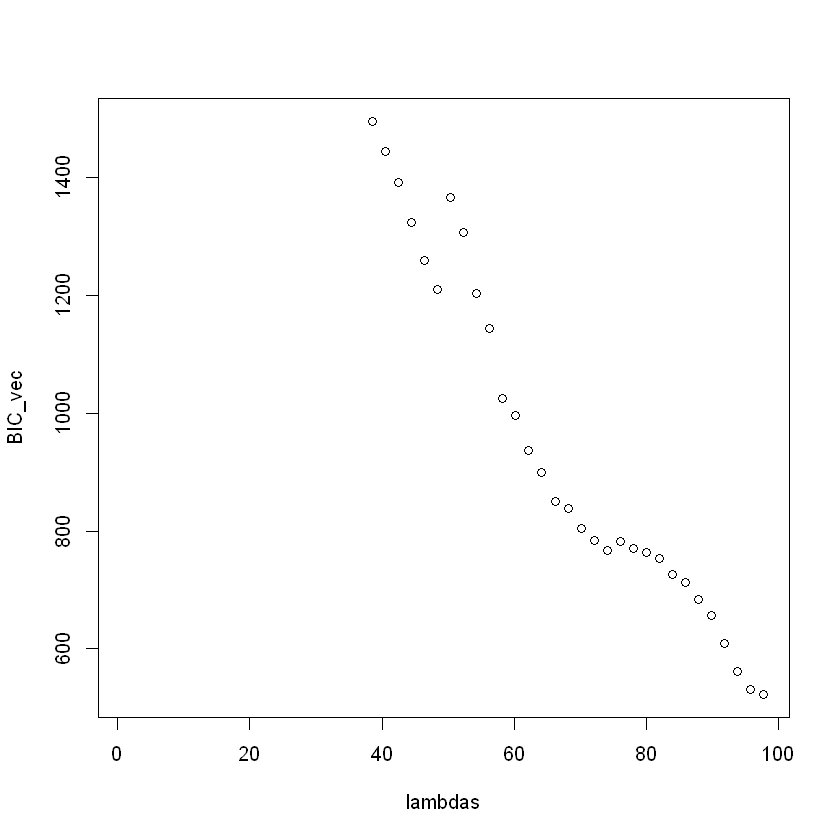

In [14]:
plot(lambdas,BIC_vec)

In [16]:
sum(glm1_final$coefficients!=0)

[1] 1

## Applying Pliable Lasso

In [7]:
library('pliable')
library('glmnet')

Caricamento del pacchetto richiesto: class

Warning message:
"il pacchetto 'class' è stato creato con R versione 4.2.3"


In [8]:
head(data)

,id,meal,time,t2,t3,t4,TG,ABCA1,ABCB1,ABCG1,⋯,GUSB,HPRT1,OAZ1,POLR1B,POLR2A,PPIA,RPL19,SDHA,TBP,TUBB
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3,0,0,0,0,0.98,-0.4407667,-0.02300431,0.5919507,⋯,-0.4925850,-0.3325347,-0.72696901,0.6194055,2.8346422,-1.856987,-0.2368612,-2.4791364,-0.2041358,3.1914714
2,2,3,1,1,0,0,1.28,-0.4407667,-0.02300431,0.5919507,⋯,-0.4925850,-0.3325347,-0.72696901,0.6194055,2.8346422,-1.856987,-0.2368612,-2.4791364,-0.2041358,3.1914714
3,2,3,2,0,1,0,1.15,-0.4407667,-0.02300431,0.5919507,⋯,-0.4925850,-0.3325347,-0.72696901,0.6194055,2.8346422,-1.856987,-0.2368612,-2.4791364,-0.2041358,3.1914714
4,2,3,3,0,0,1,1.10,-0.4407667,-0.02300431,0.5919507,⋯,-0.4925850,-0.3325347,-0.72696901,0.6194055,2.8346422,-1.856987,-0.2368612,-2.4791364,-0.2041358,3.1914714
5,7,3,0,0,0,0,0.80,-0.8013898,0.36792655,-0.6375770,⋯,-0.4807776,0.2555707,-0.05601955,-0.3416707,-0.9783225,1.086916,0.4526076,-0.4637963,1.1759174,-0.3104457
6,7,3,1,1,0,0,1.77,-0.8013898,0.36792655,-0.6375770,⋯,-0.4807776,0.2555707,-0.05601955,-0.3416707,-0.9783225,1.086916,0.4526076,-0.4637963,1.1759174,-0.3104457


In [9]:
X <- dummy_columns(data,select_columns = c('meal'))
X <- subset(X, select = -c(meal,id,TG,time,meal_1))
X <- as.matrix(X)

In [10]:
Z <- X[,c('t2','t3','t4')]
y <- as.vector(data[,'TG'])

In [404]:
plasso_fit <- pliable(x = X, z = Z, y = y, nlambda=50, alpha = 0.5, zlinear = FALSE)

plasso_cv <- cv.pliable(plasso_fit, x=X, z=Z, y=y, verbose=FALSE)

plasso_predict <- predict(plasso_fit ,x=X, z=Z, lambda = plasso_cv$lambda.min)

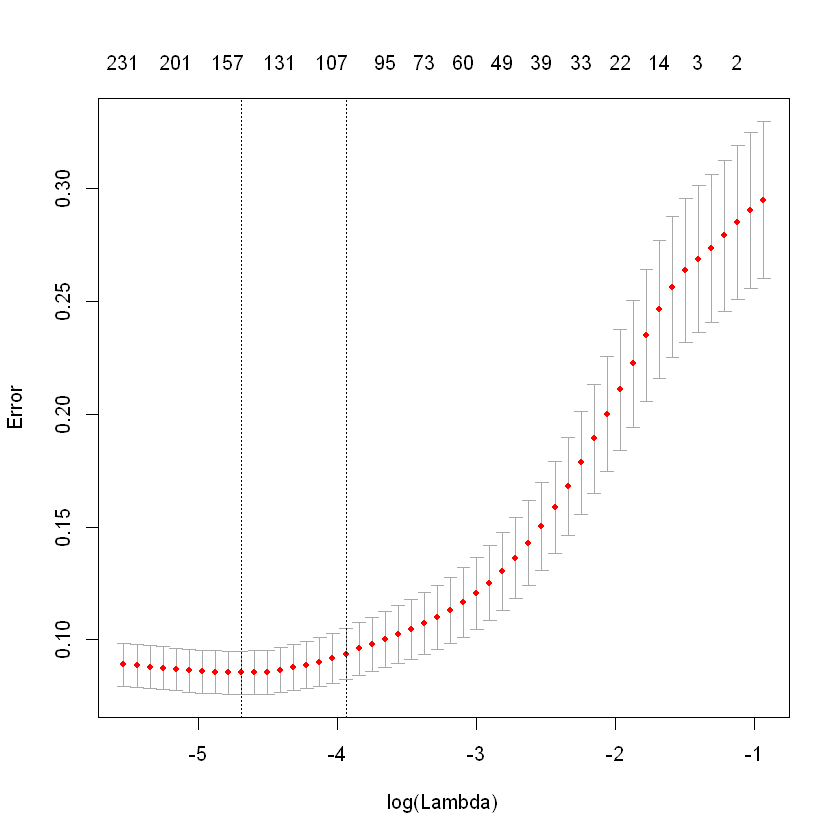

In [406]:
plot(plasso_cv)

The model selects a lot (about 150) of non-zero beta coefficients, all quite small, as well as about 50 interactions with time.

Trying to add subject id as modifying variables.

In [ ]:
X <- dummy_columns(data,select_columns = c('meal', 'id'))
X <- subset(X, select = -c(meal,id,TG,time,meal_1,id_2))
X <- as.matrix(X)

Z <- X[,c('t2','t3','t4',grep("id", colnames(X), value=TRUE))]

y <- as.vector(data[,'TG'])

train_frac = 1
nfolds = 5

smp_size_train = floor(train_frac * nrow(X))
train_ind = sort(sample(seq_len(nrow(X)), size = smp_size_train))
test_ind = setdiff(seq_len(nrow(X)), train_ind)

train_X_raw <- X[train_ind, ]
test_X_raw <- X[test_ind, ]
train_Z_raw <- Z[train_ind, ]
test_Z_raw <- Z[test_ind, ]


preprocess_values_train = preProcess(train_X_raw, method = c("center", "scale"))
X_train = predict(preprocess_values_train, train_X_raw)
X_test = predict(preprocess_values_train, test_X_raw)

preprocess_values_train_Z = preProcess(train_Z_raw, method = c("center", "scale"))
Z_train = predict(preprocess_values_train_Z, train_Z_raw)
Z_test = predict(preprocess_values_train_Z, test_Z_raw)

# z_mean = mean(train_Z_raw)
# z_sd = sd(train_Z_raw)
# 
# Z_train <- (train_Z_raw-z_mean)/z_sd
# Z_test <- (test_Z_raw-z_mean)/z_sd

y_train <- y[train_ind]
y_test <- y[test_ind]

y_test <- y_test - mean(y_train)
y_train <- y_train - mean(y_train)

foldid = sample(rep_len(1:nfolds, dim(X_train)[1]))


plasso_fit <- pliable(x = X_train, z = Z_train, y = y_train, nlambda=50, alpha = 0.5, zlinear = FALSE)

#plasso_cv <- cv.pliable(plasso_fit, x=X_train, z=Z_train, y=y_train, verbose=FALSE)

#plasso_predict <- predict(plasso_fit ,x=X_test, z=Z_test, lambda = plasso_cv$lambda.min)
#print(mean((plasso_predict-y_test)^2))

In [29]:
lasso_fit <- glmnet(X_train,y_train)
lasso_cv <- cv.glmnet(X_train,y_train,foldid=foldid)
lasso_predict <- predict(lasso_fit, newx=X_test, lambda = lasso_cv$lambda.min)
print(mean((lasso_predict-y_test)^2))

[1] 0.1217041
